In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx

In [2]:
# Load the provided CSV files into pandas dataframes
tempdata_df = pd.read_csv('tempdata.csv')
cam_temps_df = pd.read_csv('cam_temps.csv')

In [3]:
# Convert the date columns in both dataframes to a datetime format
tempdata_df['date'] = pd.to_datetime(tempdata_df['date'])
cam_temps_df['Date'] = pd.to_datetime(cam_temps_df['Date'])

In [4]:
# Function to find the nearest time in tempdata for each station
def find_nearest_time_group(tempdata_group, cam_row):
    time_diff = (tempdata_group['date'] - cam_row['Date']).abs()  # Find the absolute time difference
    min_diff_idx = time_diff.idxmin()  # Get the index of the minimum time difference
    return tempdata_group.loc[[min_diff_idx]]  # Return as a dataframe row for consistency

# Apply the function across all cam_temps for each station
merged_list = []
for i, cam_row in cam_temps_df.iterrows():
    for station, tempdata_group in tempdata_df.groupby('station'):
        nearest_row = find_nearest_time_group(tempdata_group, cam_row)
        nearest_row['cam_temp'] = cam_row['Temp']  # Add the camera temperature for comparison
        merged_list.append(nearest_row)  # Append the dataframe row to the list

In [5]:
# Concatenate all matched rows into a single dataframe
matched_df = pd.concat(merged_list, ignore_index=True)

# Calculate the temperature difference
matched_df['temp_diff'] = matched_df['cam_temp'] - matched_df['temp']

In [6]:
matched_df

,station,lat,long,date,temp,cam_temp,temp_diff
0,"ALBANY INTERNATIONAL AIRPORT, NY US",42.74722,-73.79913,2024-09-17 19:51:00,65.0,69,4.0
1,"BENNINGTON WILLIAM H. MORSE STATE AIRPORT, VT US",42.89350,-73.24875,2024-09-17 19:54:00,64.0,69,5.0
2,"CHICOPEE FALLS WESTOVER FIELD, MA US",42.20000,-72.53333,2024-09-17 19:55:00,60.0,69,9.0
3,"HARTFORD BRADLEY INTERNATIONAL AIRPORT, CT US",41.93742,-72.68202,2024-09-17 19:51:00,67.0,69,2.0
4,"HARTFORD BRAINARD AIRPORT, CT US",41.73520,-72.65115,2024-09-17 19:53:00,67.0,69,2.0
...,...,...,...,...,...,...,...
1750,"PITTSFIELD MUNICIPAL AIRPORT, MA US",42.42686,-73.28907,2024-09-23 00:54:00,48.0,62,14.0
1751,"POUGHKEEPSIE HUDSON VALLEY REGIONAL AIRPORT, N...",41.62574,-73.88155,2024-09-23 02:53:00,56.0,62,6.0
1752,"SCHENECTADY, NY US",42.85000,-73.95000,2024-09-22 19:45:00,66.0,62,-4.0
1753,"WESTFIELD BARNES REGIONAL AIRPORT, MA US",42.16005,-72.71246,2024-09-23 00:53:00,49.0,62,13.0


In [7]:
# Calculate summary statistics for each station
summary_stats = matched_df.groupby('station')['temp_diff'].describe()

# Calculate the correlation coefficient between cam_temp and temp for each station
correlation = matched_df.groupby('station').apply(lambda x: x['cam_temp'].corr(x['temp']))

# Add the correlation coefficient to the summary statistics
summary_stats['correlation'] = correlation
summary_stats

C:\Users\andre\AppData\Local\Temp\ipykernel_7916\2004174002.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation = matched_df.groupby('station').apply(lambda x: x['cam_temp'].corr(x['temp']))


,count,mean,std,min,25%,50%,75%,max,correlation
station,,,,,,,,,
"ALBANY INTERNATIONAL AIRPORT, NY US",116.0,-4.818966,5.525591,-18.0,-9.00,-5.0,0.00,7.0,0.749318
"BENNINGTON WILLIAM H. MORSE STATE AIRPORT, VT US",116.0,-1.241379,6.701876,-14.0,-7.25,-1.5,5.00,12.0,0.689206
"CHICOPEE FALLS WESTOVER FIELD, MA US",116.0,-2.267241,6.569174,-15.0,-7.00,-2.0,3.00,10.0,0.799138
"HARTFORD BRADLEY INTERNATIONAL AIRPORT, CT US",116.0,-4.939655,5.592369,-17.0,-8.25,-4.5,-1.00,7.0,0.821400
"HARTFORD BRAINARD AIRPORT, CT US",116.0,-4.310345,4.362715,-14.0,-7.00,-4.0,-2.00,8.0,0.866098
"HUDSON RIVER RESERVE, NY US",95.0,-2.431579,5.189295,-15.0,-5.50,-2.0,2.00,6.0,0.774600
"KEENE DILLANT HOPKINS AIRPORT, NH US",116.0,-0.017241,6.755330,-13.0,-4.25,1.0,5.00,14.0,0.809936
"MILLBROOK 3 W, NY US",117.0,-1.299145,7.238862,-14.0,-8.00,-2.0,6.00,13.0,0.605731
"NORTH ADAMS HARRIMAN AIRPORT, MA US",116.0,0.534483,7.905343,-15.0,-7.00,1.5,8.00,15.0,0.641767


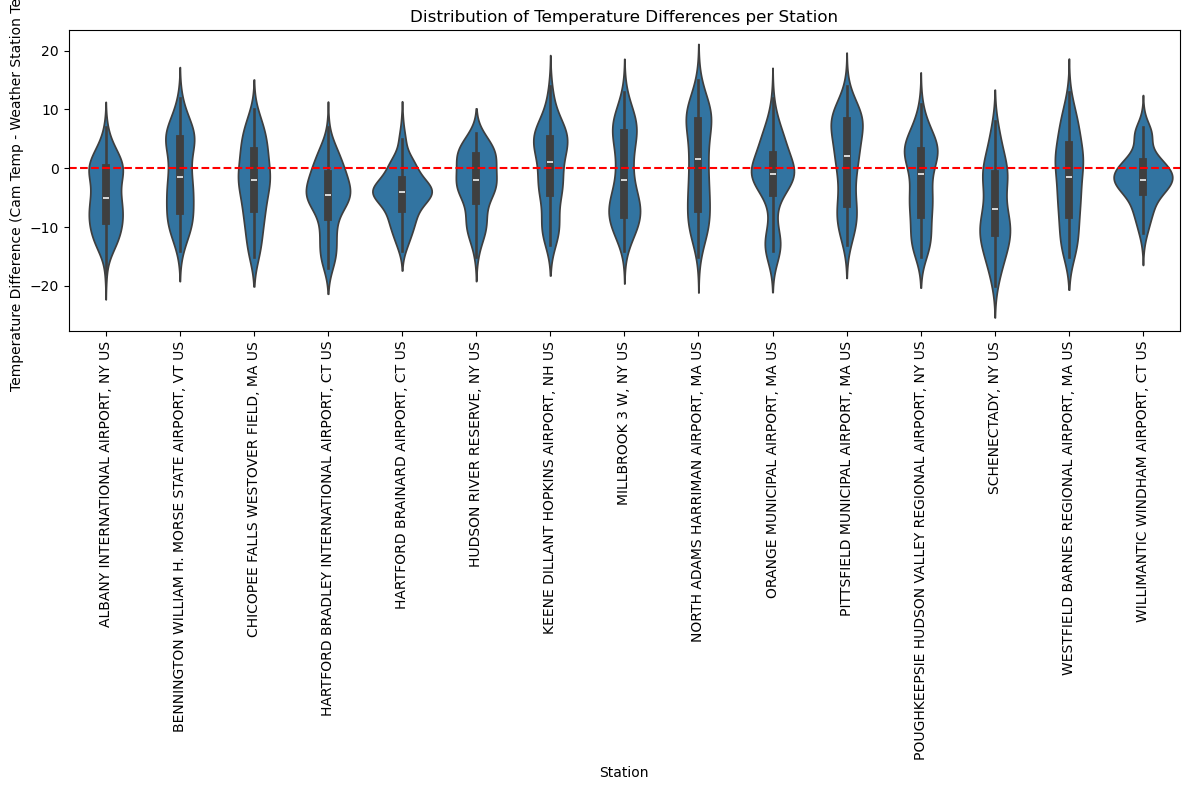

In [8]:
# Create a violin plot of the temperature differences for each station
plt.figure(figsize=(12, 8))
sns.violinplot(x='station', y='temp_diff', data=matched_df)
plt.xticks(rotation=90)
plt.title('Distribution of Temperature Differences per Station')
plt.xlabel('Station')
plt.ylabel('Temperature Difference (Cam Temp - Weather Station Temp)')
plt.axhline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

In [9]:
# Calculate the mean temperature difference for each station
mean_diff_by_station = matched_df.groupby(['station', 'lat', 'long'])['temp_diff'].mean().reset_index()

In [10]:
# Convert to a GeoDataFrame for plotting
gdf = gpd.GeoDataFrame(mean_diff_by_station, geometry=gpd.points_from_xy(mean_diff_by_station['long'], mean_diff_by_station['lat']))

In [11]:
# Ensure correlation column is merged correctly into the GeoDataFrame
correlation_df = correlation.reset_index()
correlation_df.columns = ['station', 'correlation']

In [12]:
# Merge correlation data into the existing GeoDataFrame
gdf = gdf.merge(correlation_df, on='station', how='left')

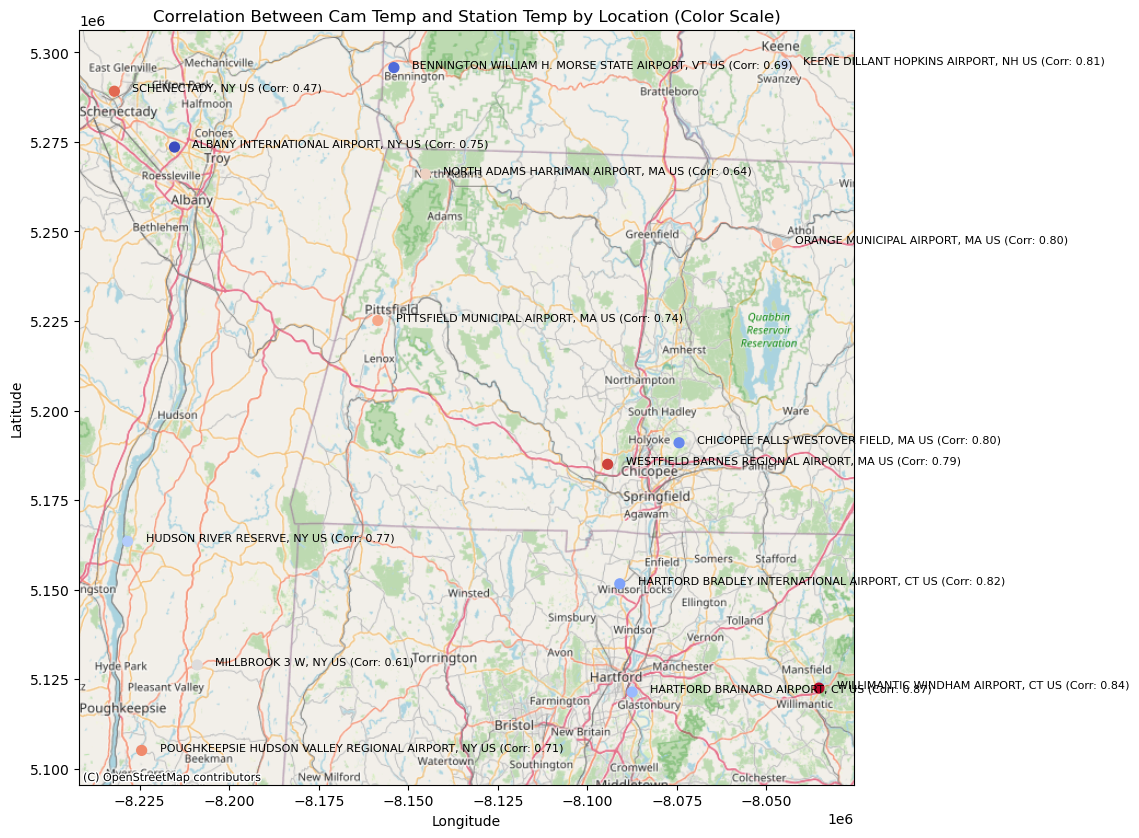

In [13]:

# Ensure the GeoDataFrame has a CRS (WGS 84 - EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Reproject to Web Mercator (EPSG:3857) for compatibility with the basemap
gdf = gdf.to_crs(epsg=3857)

# Plot the stations with color representing the correlation coefficient, and add a basemap
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the stations with color representing the correlation coefficient
gdf.plot(ax=ax, marker='o', c=gdf['correlation'], cmap='coolwarm', markersize=50, legend=True)

# Add labels to the stations, showing the correlation coefficient and adjusting position to avoid overlap
for x, y, label, corr in zip(gdf.geometry.x, gdf.geometry.y, gdf['station'], gdf['correlation']):
    ax.text(x + 5000, y, f"{label} (Corr: {corr:.2f})", fontsize=8)  # Adjust x by 5000 meters to avoid overlap

# Add a basemap using OpenStreetMap (an alternative provider)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Set axis titles
plt.title('Correlation Between Cam Temp and Station Temp by Location (Color Scale)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the final plot with the basemap
plt.show()